# แบบฝึกหัดที่ 3
14123402	ปัญญาประดิษฐ์	Artificial Intelligence	3(2-2-5)	 
63102105112 อัครพล พิกุลศรี

### 1. จากภาพจงแสดงขั้นตอนการค้นหาเส้น และต้นไม้ค้นหา (search tree) จาก u ไป w และเขียนโปรแกรมด้วยภาษา python

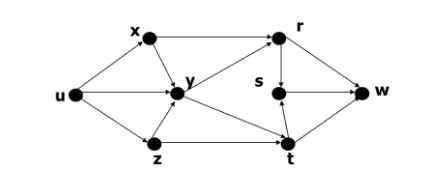

ต้นไม้ค้นหา (search tree) 

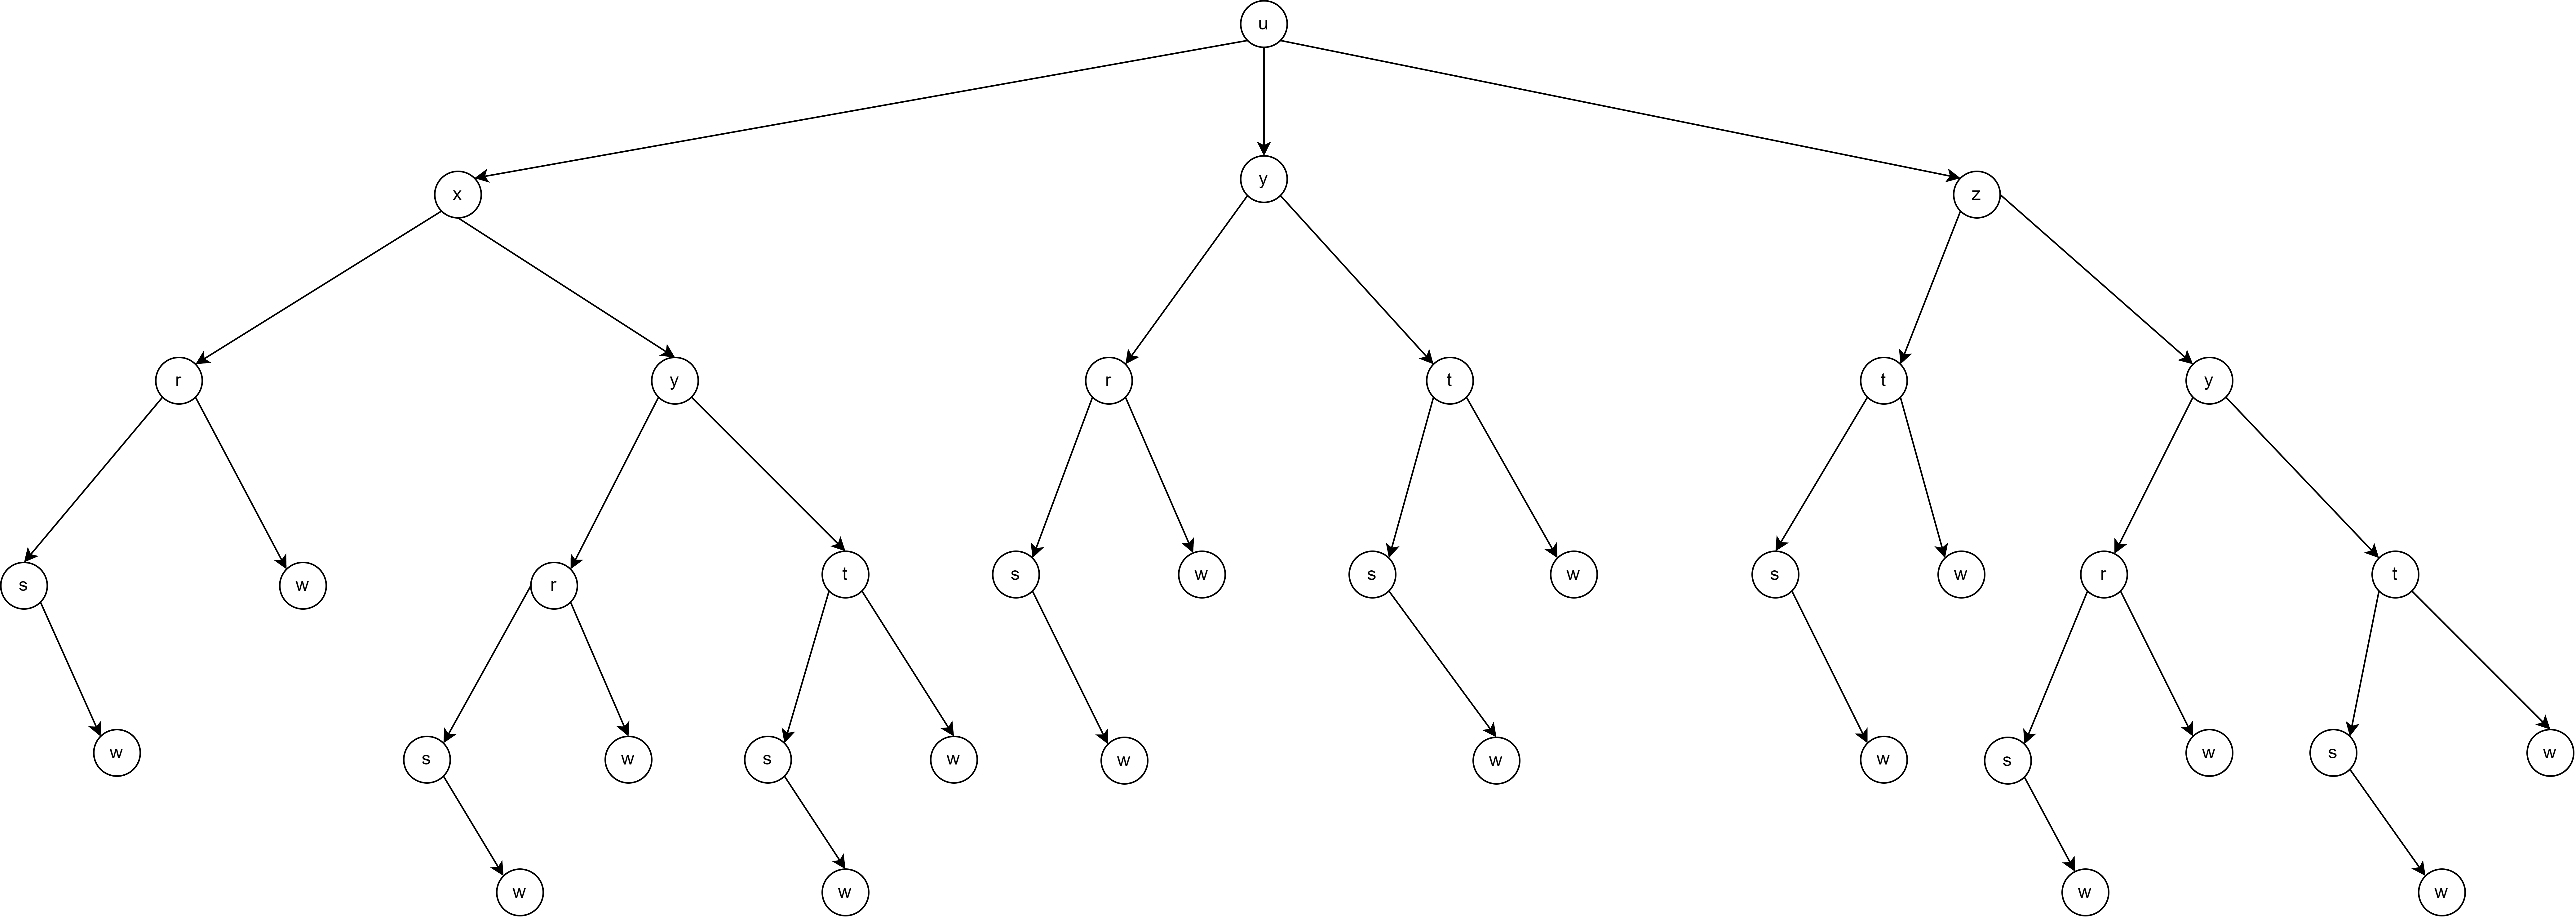

In [8]:
# จากโจทย์สามารถนำมาทำเป็น list ได้ดังนี้
graph = [
         ['u','-->','x'],
         ['u','-->','y'],
         ['u','-->','z'],
         ['x','-->','y'],
         ['x','-->','r'],
         ['y','-->','r'],
         ['y','-->','t'],
         ['z','-->','y'],
         ['z','-->','t'],
         ['r','-->','w'],
         ['r','-->','s'],
         ['s','-->','w'],
         ['t','-->','s'],
         ['t','-->','w'],  
]

### a) Breadth-first search

In [9]:
def BFS_noncycles(startState, goalState):
  return BFS_Q([[startState]], goalState, graph, V=[startState])

def GetMoves(sState, lst):
  if lst == []:
    return []
  else:
    templst = lst.copy()
    x = templst.pop(0)
    tempx = x.copy()
    if tempx.pop(0) == sState:
      return [tempx.pop(1)] + GetMoves(sState, templst)
    else:
      return GetMoves(sState, templst)

def extend_all(path, nextStates, V):
  if len(nextStates) < 1:
    return []
  elif nextStates[0] in path:
    nextStates.pop(0)
    return extend_all(path, nextStates, V)
  elif nextStates[0] in V:
    nextStates.pop(0)
    return extend_all(path, nextStates, V)
  else:
    x = nextStates.pop(0)
    V.append(x)
    return [ [x] + path] + extend_all(path, nextStates, V)

count = 0
def BFS_Q(paths, goalState, lst, V):
  global count
  count+=1
  print(f"\n{count}-- BFS path--\n",paths)
  if len(paths) < 1:
    return paths
  elif paths[0][0] == goalState:
    return paths[0]
  else:
    lstTemp = lst.copy()
    tempPaths = paths.copy()
    p = tempPaths[0]
    x = tempPaths[0][0]
    tempPaths.pop(0)
    moves = GetMoves(x, lstTemp)
    nextPaths = extend_all(p, moves, V)
    return BFS_Q(tempPaths + nextPaths, goalState, lstTemp, V)

res=BFS_noncycles('u', 'w')
print(f"\n{count+1}-- BFS result--\n", res)



1-- BFS path--
 [['u']]

2-- BFS path--
 [['x', 'u'], ['y', 'u'], ['z', 'u']]

3-- BFS path--
 [['y', 'u'], ['z', 'u'], ['r', 'x', 'u']]

4-- BFS path--
 [['z', 'u'], ['r', 'x', 'u'], ['t', 'y', 'u']]

5-- BFS path--
 [['r', 'x', 'u'], ['t', 'y', 'u']]

6-- BFS path--
 [['t', 'y', 'u'], ['w', 'r', 'x', 'u'], ['s', 'r', 'x', 'u']]

7-- BFS path--
 [['w', 'r', 'x', 'u'], ['s', 'r', 'x', 'u']]

8-- BFS result--
 ['w', 'r', 'x', 'u']


### Breadth First Search spanning tree : diagram.io
image viewer

https://raw.githubusercontent.com/billowdev/basic-algorithm/main/bfs-spanning-tree.drawio.png

bfs-spanning-tree.drawio.png

### b) Depth-first search

In [11]:
def DFS_noncycles(startState, goalState):
  return DFS_Q([[startState]], goalState, graph, V=[startState])

def GetMoves(sState, lst):
  if lst == []:
    return []
  else:
    templst = lst.copy()
    x = templst.pop(0)
    tempx = x.copy()
    if tempx.pop(0) == sState:
      return [tempx.pop(1)] + GetMoves(sState, templst)
    else:
      return GetMoves(sState, templst)

def extend_all_DFS(path, nextStates, V):
  if len(nextStates) < 1:
    return []
  elif nextStates[0] in path:
    nextStates.pop(0)
    return extend_all_DFS(path, nextStates, V)
  elif nextStates[0] in V:
    nextStates.pop(0)
    return extend_all_DFS(path, nextStates, V)
  else:
    x = nextStates.pop(0)
    V.append(x)
    return [[x]+path ] + extend_all_DFS(path, nextStates, V)

count = 0

def DFS_Q(paths, goalState, lst, V):
  global count
  count+=1
  print(f"\n{count}--DFS path--\n",paths)

  if len(paths) < 1:
    return paths
  elif paths[0][0] == goalState:
    return paths[0]
  else:
    lstTemp = lst.copy()
    tempPaths = paths.copy()
    p = tempPaths[0]
    x = tempPaths[0][0]
    tempPaths.pop(0)
    moves = GetMoves(x, lstTemp)
    nextPaths = extend_all_DFS(p, moves, V)
    return DFS_Q( nextPaths + tempPaths, goalState, lstTemp, V)

res=DFS_noncycles('u', 'w')
print(f"\n{count+1}--DFS result--\n", res)



1--DFS path--
 [['u']]

2--DFS path--
 [['x', 'u'], ['y', 'u'], ['z', 'u']]

3--DFS path--
 [['r', 'x', 'u'], ['y', 'u'], ['z', 'u']]

4--DFS path--
 [['w', 'r', 'x', 'u'], ['s', 'r', 'x', 'u'], ['y', 'u'], ['z', 'u']]

5--DFS result--
 ['w', 'r', 'x', 'u']


### c) Progressive Deeping Search: PDS